In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [55]:
df = pd.read_csv('data-export (1).csv')

In [56]:
df.columns = df.iloc[0]
df = df.drop(index = 0).reset_index(drop = True)

In [57]:
df.columns = ["channel group","Date_hours","Users","Sessions","Engagged Sessions", "Average engagement time pr sessions", "Engagged sessions pr User","Events per sessions","Engagement rate","Event Count"]

In [58]:
df.head()

,channel group,Date_hours,Users,Sessions,Engagged Sessions,Average engagement time pr sessions,Engagged sessions pr User,Events per sessions,Engagement rate,Event Count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


cleaning data and data validation for the above data set

In [61]:
df["Date_hours"] = pd.to_datetime(df["Date_hours"], format='%Y%m%d%H' , errors='coerce')

In [63]:
numeric_cols = df.columns.drop(["channel group","Date_hours"])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
df["Hour"] = df["Date_hours"].dt.hour


In [65]:
df.head()

,channel group,Date_hours,Users,Sessions,Engagged Sessions,Average engagement time pr sessions,Engagged sessions pr User,Events per sessions,Engagement rate,Event Count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   channel group                        3182 non-null   object        
 1   Date_hours                           3182 non-null   datetime64[ns]
 2   Users                                3182 non-null   int64         
 3   Sessions                             3182 non-null   int64         
 4   Engagged Sessions                    3182 non-null   int64         
 5   Average engagement time pr sessions  3182 non-null   float64       
 6   Engagged sessions pr User            3182 non-null   float64       
 7   Events per sessions                  3182 non-null   float64       
 8   Engagement rate                      3182 non-null   float64       
 9   Event Count                          3182 non-null   int64         
 10  Hour        

In [67]:
df.describe()

,Date_hours,Users,Sessions,Engagged Sessions,Average engagement time pr sessions,Engagged sessions pr User,Events per sessions,Engagement rate,Event Count,Hour
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


sessions and user over time

In [68]:
sns.set(style="whitegrid")

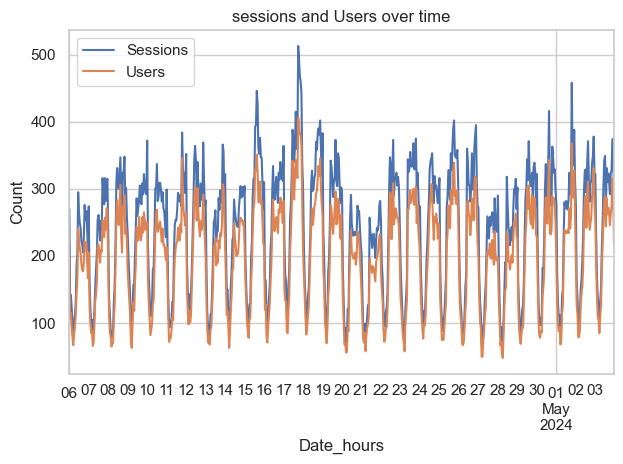

In [72]:
plt.Figure(figsize=(10,5))
df.groupby("Date_hours")[["Sessions","Users"]].sum().plot(ax=plt.gca())
plt.title("sessions and Users over time")
plt.xlabel("Date_hours")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

total users by channel

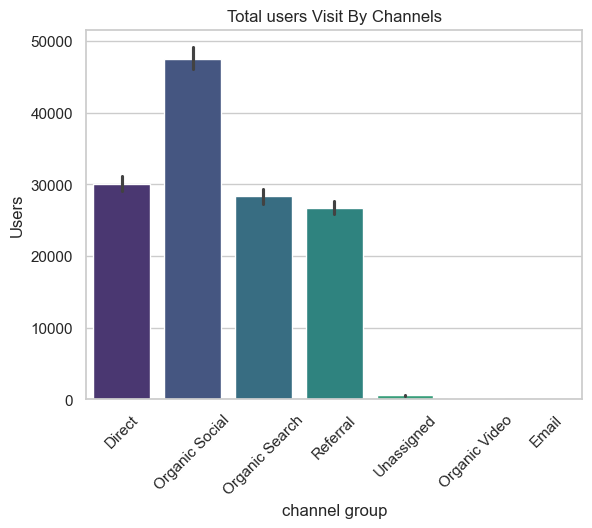

In [95]:
plt.Figure(figsize=(8,5))
sns.barplot(data=df, x="channel group", y="Users", estimator=np.sum ,hue="channel group", palette="viridis")
plt.title("Total users Visit By Channels")
plt.xticks(rotation = 45)
plt.show()

Average engagement time by channel

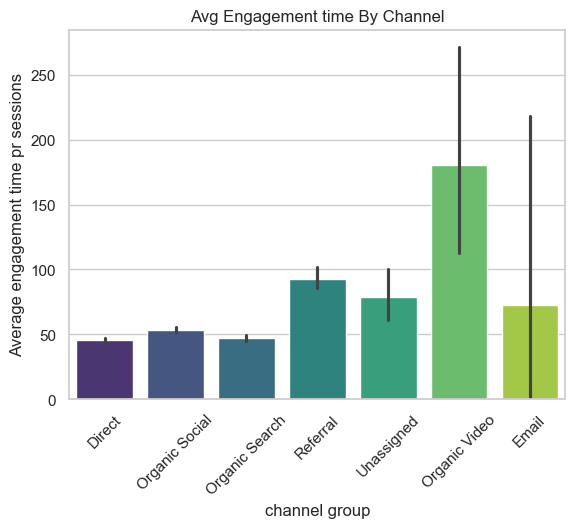

In [94]:
plt.Figure(figsize=(8,5))
sns.barplot(data=df, x="channel group", y="Average engagement time pr sessions", estimator=np.mean ,hue="channel group", palette="viridis")
plt.title("Avg Engagement time By Channel")
plt.xticks(rotation = 45)
plt.show()

Engagement Rate Distribution by channel

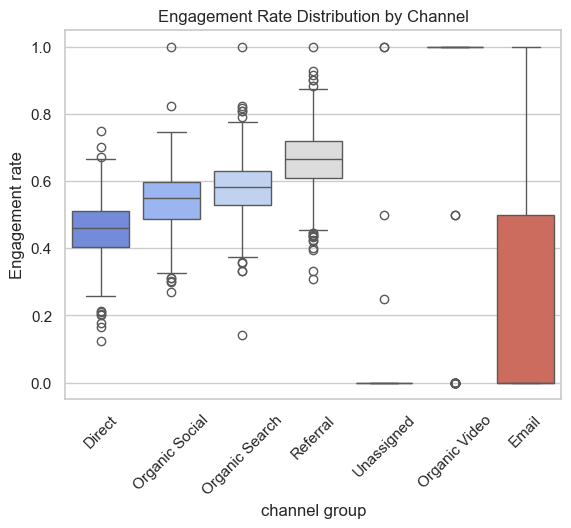

In [93]:
plt.Figure(figsize=(8,5))
sns.boxplot(data=df, x= "channel group", y="Engagement rate",hue="channel group",palette="coolwarm")
plt.title("Engagement Rate Distribution by Channel")
plt.xticks(rotation=45)
plt.show()

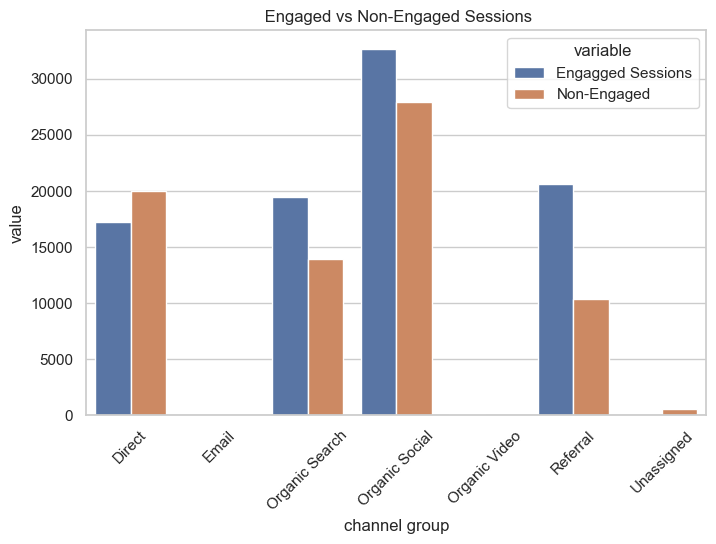

In [81]:
session_df = df.groupby("channel group")[["Sessions", "Engagged Sessions"]].sum().reset_index()
session_df[ "Non-Engaged"] = session_df[ "Sessions"] - session_df["Engagged Sessions"]
session_df_melted = session_df.melt(id_vars="channel group", value_vars=["Engagged Sessions", "Non-Engaged"])
plt.figure(figsize=(8, 5))
sns.barplot(data=session_df_melted, x="channel group", y="value", hue="variable")
plt.title(" Engaged vs Non-Engaged Sessions")
plt.xticks(rotation=45)
plt.show()

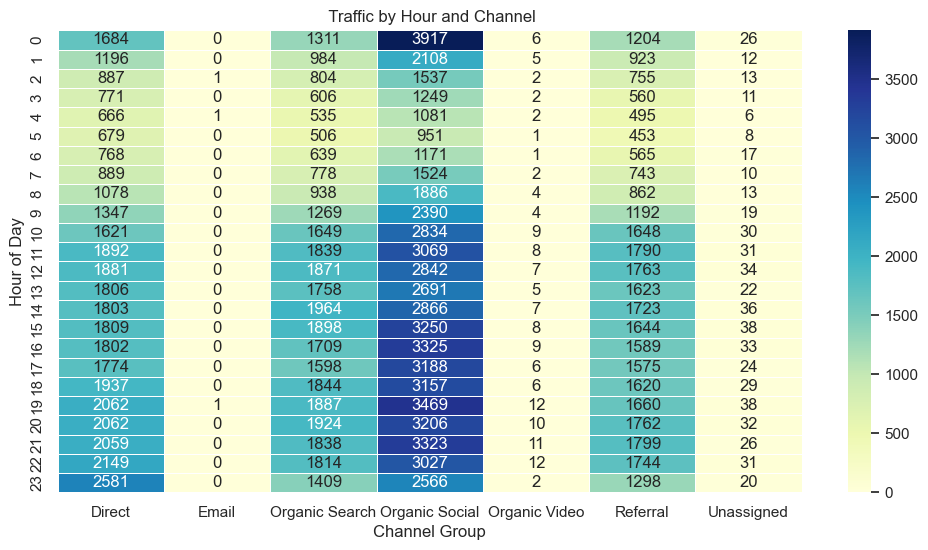

In [83]:
heatmap_data = df.groupby(["Hour", "channel group"])["Sessions"].sum().unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=.5, annot = True, fmt='.0f')
plt.title(" Traffic by Hour and Channel")
plt.xlabel("Channel Group")
plt.ylabel("Hour of Day")
plt.show()

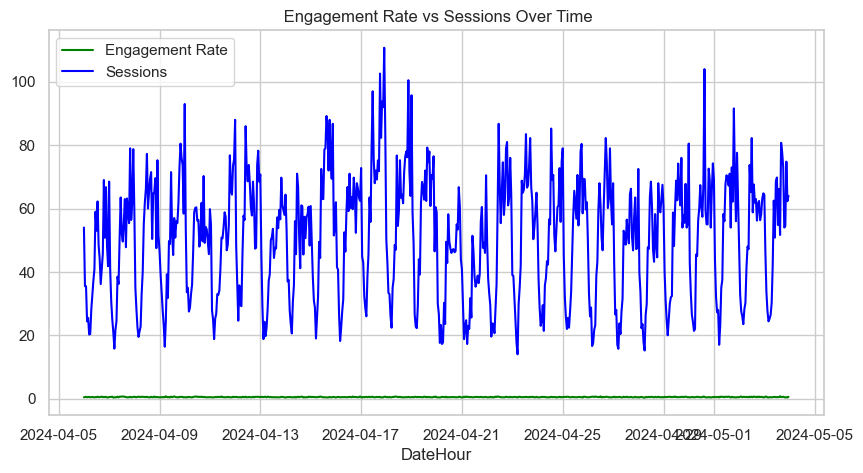

In [92]:
df_plot = df.groupby("Date_hours")[["Engagement rate", "Sessions"]].mean().reset_index()
plt.figure(figsize=(10, 5))
plt.plot(df_plot["Date_hours"],df_plot["Engagement rate"], label="Engagement Rate", color="green")
plt.plot(df_plot["Date_hours"], df_plot["Sessions"], label="Sessions", color="blue")
plt.title(" Engagement Rate vs Sessions Over Time")
plt.xlabel("DateHour")
plt.legend()
plt.grid(True)
plt.show()